<a href="https://colab.research.google.com/github/manavhnr/colab_learning_projects/blob/main/housepricelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAE: 0.54, MSE: 0.55, RMSE: 0.74, R²: 0.60


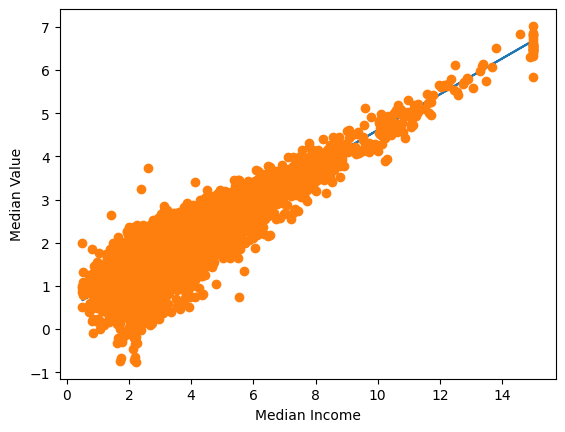

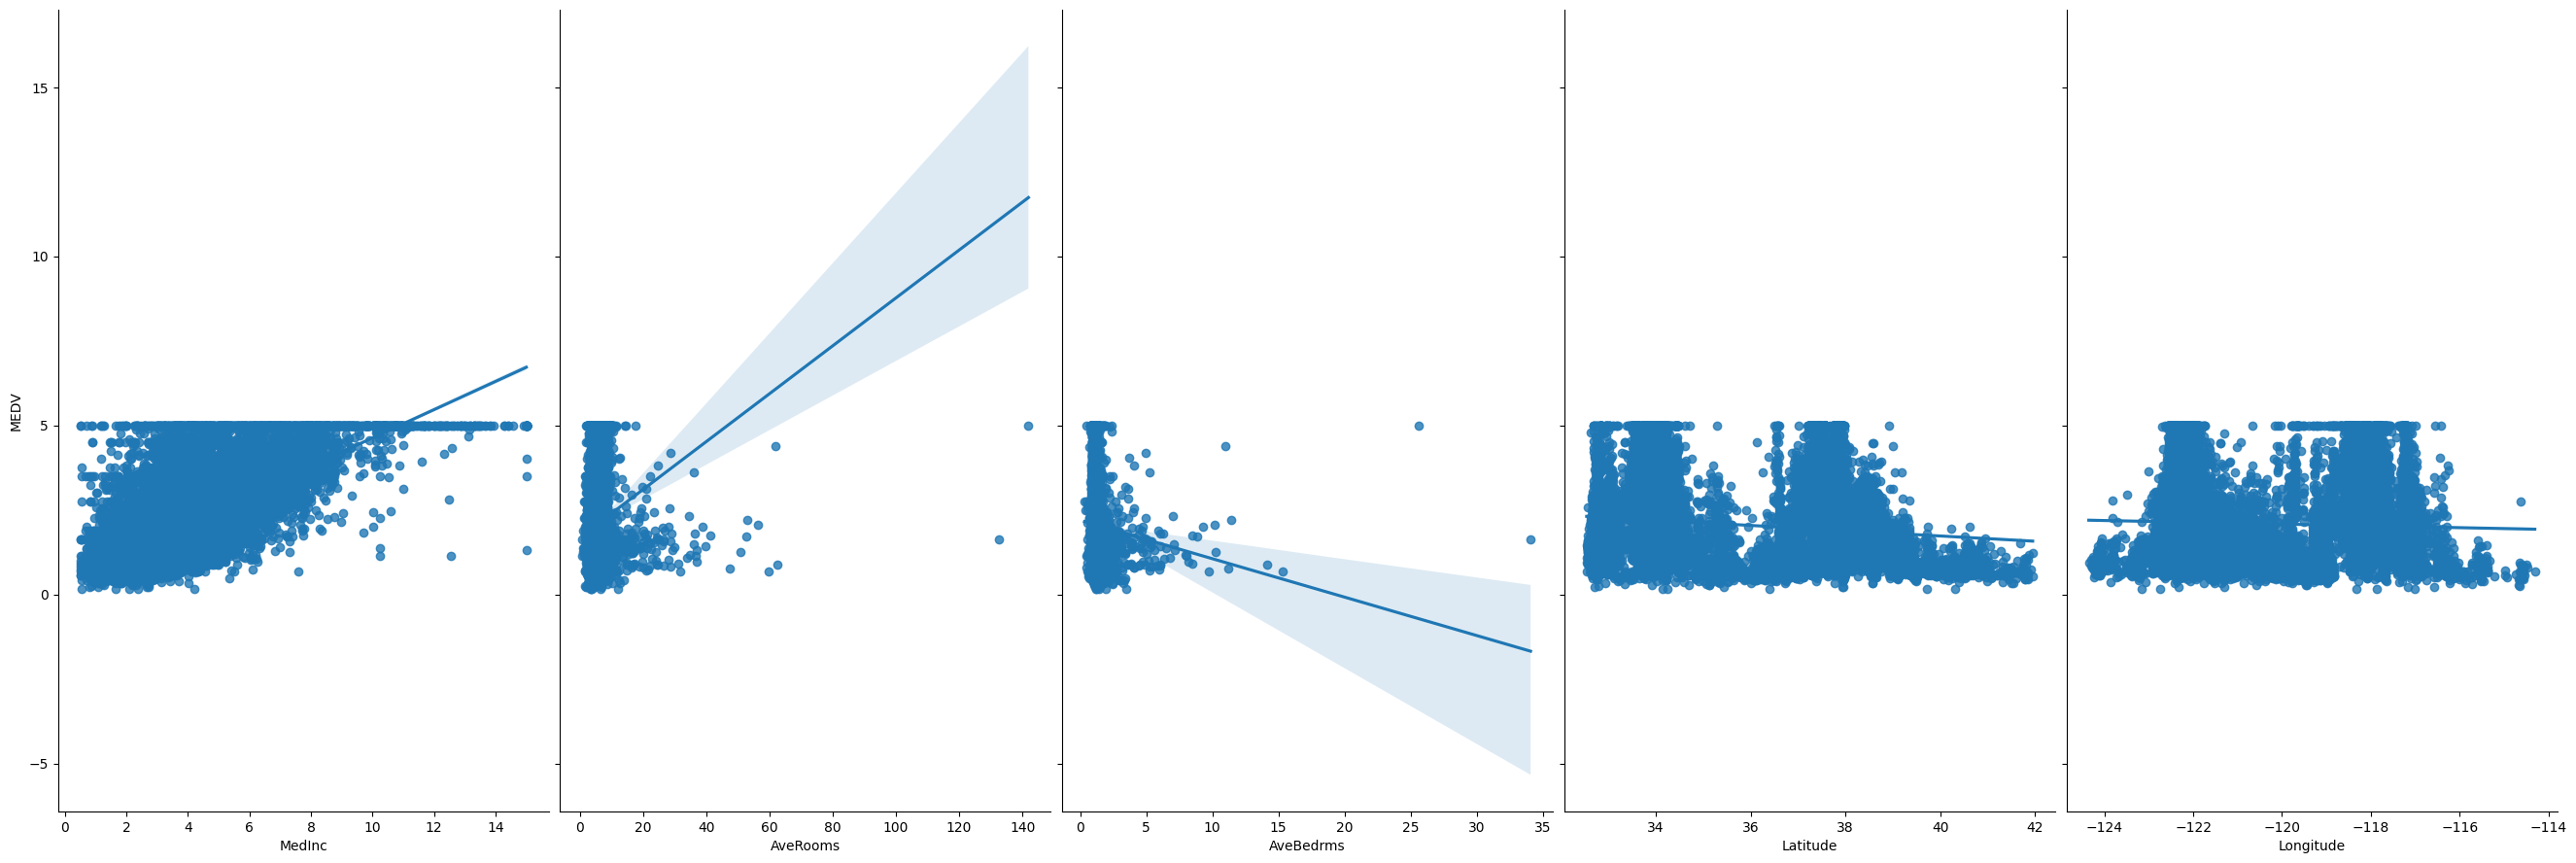

In [69]:
#imports
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import seaborn
from sklearn.datasets import fetch_california_housing
from sklearn import metrics
import matplotlib.pyplot as plt


housing = fetch_california_housing()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#understanding the dataset

#print(housing.keys())

#print(housing.DESCR)
#print(housing.feature_names)
#print(housing.target_names)
#print(housing.frame)
#print(housing.target)
#print(housing.data)

#create the data frame
data_frame=pd.DataFrame(housing.data,columns=housing.feature_names)

# test view dataframe
data_frame.head(5)
data_frame.tail(5)

data_frame.describe()

#add column
data_frame['MEDV']=housing.target
data_frame.head(5)

data_frame.info

#check if any null columns
data_frame.isnull().sum()

#plot
#seaborn.boxplot(data_frame)
#seaborn.heatmap(data_frame)
#seaborn.kdeplot(data_frame)

#modle implementation
x1 = data_frame[['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']]
y1 = data_frame['MEDV']
x_train, x_test, y_train,y_test=train_test_split(x1,y1,test_size=0.33,random_state=5)

#regression on data
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
data_frame_pred=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data_frame_pred

#test
mae=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r2=metrics.r2_score(y_test,y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

x2=np.array(x_test['MedInc'])
y2=np.array(y_pred)
m,b=np.polyfit(x2,y2,1)

#plot the graphs
plt.plot(x_test['MedInc'], m*x_test['MedInc'] + b)
plt.plot(x_test['MedInc'],y_pred,'o')
plt.xlabel("Median Income")
plt.ylabel("Median Value")

seaborn.pairplot(data_frame, x_vars=['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude'], y_vars='MEDV', height=9, aspect=0.6, kind='reg')